# Description of the Notebook

This notebook focuses on evaluating the performance of a fine-tuned model using a specific test dataset. The main objective is to compare the model's predictions with ground truth data to assess its accuracy and reliability.

### Dataset Description
The test dataset is comprised of two primary components:

- **Test Images**: Stored in the `data/test/test_img` folder, these images serve as inputs for the model's predictions.
- **Test Labels**: Found in the `data/testylo` folder, these labels provide the ground truth, including annotations and classifications, for comparison with the model's predictions.

### Testing Methodology
The testing procedure encompasses several critical steps:

> **Model Loading**: Both the fine-tuned model and a default version are loaded for comparative analysis.

> **Prediction Generation**: The models generate predictions, including bounding boxes and classification labels for detected objects in the test images.

> **Visualization**: To clearly and intuitively showcase the models' performance, both ground truth and predicted bounding boxes are visually displayed on the test images. This visualization includes distinct bounding box representations for the ground truth, default model predictions, and fine-tuned model predictions.


In [1]:
from IPython.display import clear_output
import warnings
from super_gradients.training import models
import os
from PIL import Image
import torch
from detection_NAS_utils import *
import warnings
warnings.filterwarnings("ignore")


The console stream is logged into C:\Users\Admin\sg_logs\console.log


[2023-12-03 22:42:58] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-12-03 22:42:58] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-03 22:42:58,818] torch.distributed.elastic.multiprocessing.redirects: [WARNING] NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-12-03 22:42:59] INFO - utils.py - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2023-12-03 22:42:59] INFO - utils.py - NumExpr defaulting to 8 threads.
[2023-12-03 22:43:10] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-03 22:43:10] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-03 22:43:10] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-03 22:43:10] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernel

In [2]:
DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
#MODEL_ARCH = 'yolo_nas_l'
data_directory = 'C:/Users/Admin/github/AI_project/data'
dataset_params['data_dir'] = data_directory

In [3]:

### Loading ground truth data (bounding box information)
test_images = data_directory + "/test/test_img"
test_labels = data_directory + "/test/testyolo"

### Load the model (default Yolo_Nas_L)
yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco").to(DEVICE)

### Loading model (after fine-tuning)

windows_path = r'C:\Users\Admin\github\AI_project\checkpoints\yolonas_AI\RUN_20231129_152344_166402\ckpt_best.pth'
model_path = windows_path.replace('\\', '/')
best_model = models.get('yolo_nas_l',num_classes=6,checkpoint_path=model_path)

[2023-12-03 22:43:20] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-12-03 22:43:20] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l
[2023-12-03 22:43:24] INFO - checkpoint_utils.py - Successfully loaded model weights from C:/Users/Admin/github/AI_project/checkpoints/yolonas_AI/RUN_20231129_152344_166402/ckpt_best.pth EMA checkpoint.


### Get bounding boxes of the predicted images: at the test folder

[2023-12-03 22:43:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


[2023-12-03 22:43:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


C:\Users\Admin\github\AI_project\data\test\test_img\4.jpg


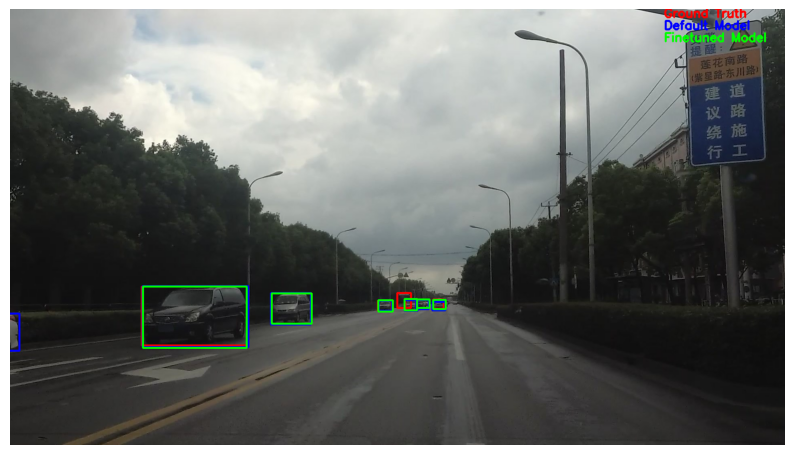

[2023-12-03 22:43:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-03 22:43:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


C:\Users\Admin\github\AI_project\data\test\test_img\5.jpg


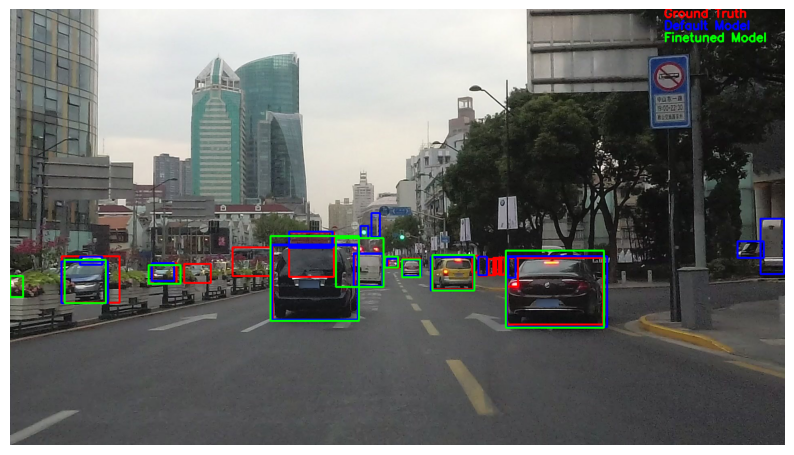

In [4]:
image_files = sorted(list(Path(test_images).rglob("*.jpg")))
label_files = sorted(list(Path(test_labels).rglob("*.txt")))

default_model = yolo_nas_l
finetuned_model = best_model 
iou_dicts = []
for i in range (len(image_files)):
    test_image_path = str(image_files[i])
    test_image_label = str(label_files[i])
    prediction_dict = get_boxex_for_all_models_car(test_image_path,test_image_label,default_model,finetuned_model, conf = 0.3)
    print(prediction_dict['image'])
    #iou_dicts.append(compute_iou_for_all_models(prediction_dict))
    draw_boxes_all_models(test_image_path, prediction_dict)
    

From the test result, it can be seen thatm in some some cases, the finetuned model were able to detect the object without the ground truth. 